In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ins = pd.read_csv('insurance.csv')

df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Membuat duplikasi dataframe
df_model = df_ins.copy()

In [4]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,47,"[19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2..."
1,sex,object,0,0.0,2,"[female, male]"
2,bmi,float64,0,0.0,548,"[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4..."
3,children,int64,0,0.0,6,"[0, 1, 3, 2, 5, 4]"
4,smoker,object,0,0.0,2,"[yes, no]"
5,region,object,0,0.0,4,"[southwest, southeast, northwest, northeast]"
6,charges,float64,0,0.0,1337,"[16884.924, 1725.5523, 4449.462, 21984.47061, ..."


<Axes: >

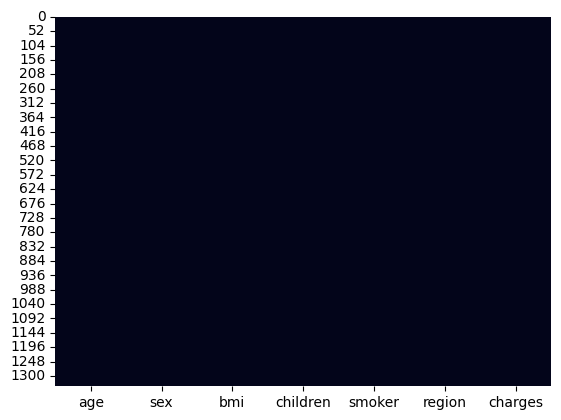

In [5]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False)

In [6]:
# Cek data duplikat
df_model.duplicated().sum()

1

In [7]:
df_model.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Cek nilai missing value
df_model.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
for x in df_model.columns:
    total_unique_values = len(df_model[x].unique())
    print(f"Unique value of {x} is {total_unique_values}")

Unique value of age is 47
Unique value of sex is 2
Unique value of bmi is 548
Unique value of children is 6
Unique value of smoker is 2
Unique value of region is 4
Unique value of charges is 1337


In [11]:
df_model["age"] = pd.qcut(df_model["age"], 10, labels=False)
df_model.head()

,age,sex,bmi,children,smoker,region,charges
0,0,female,27.900,0,yes,southwest,16884.92400
1,0,male,33.770,1,no,southeast,1725.55230
2,2,male,33.000,3,no,southeast,4449.46200
3,3,male,22.705,0,no,northwest,21984.47061
4,3,male,28.880,0,no,northwest,3866.85520


In [12]:
df_encoded = pd.get_dummies(df_model)
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,0,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,2,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,3,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,3,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [13]:
X = df_encoded.drop(columns='charges')
y = df_encoded['charges'].values

feature_names = X.columns
target_names = "charges"
display(X,y)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,27.900,0,True,False,False,True,False,False,False,True
1,0,33.770,1,False,True,True,False,False,False,True,False
2,2,33.000,3,False,True,True,False,False,False,True,False
3,3,22.705,0,False,True,True,False,False,True,False,False
4,3,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,7,30.970,3,False,True,True,False,False,True,False,False
1334,0,31.920,0,True,False,True,False,True,False,False,False
1335,0,36.850,0,True,False,True,False,False,False,True,False
1336,1,25.800,0,True,False,True,False,False,False,False,True


array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2024)

In [15]:
from sklearn.tree import DecisionTreeRegressor

clf_decisiontree = DecisionTreeRegressor()
clf_decisiontree.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
import pickle

filename = 'dt_model_charges.sav'
pickle.dump(clf_decisiontree, open(filename,'wb'))